In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el dataset
file_path = 'heart_cleveland_upload.csv'
data = pd.read_csv(file_path)

Estadísticas descriptivas:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   


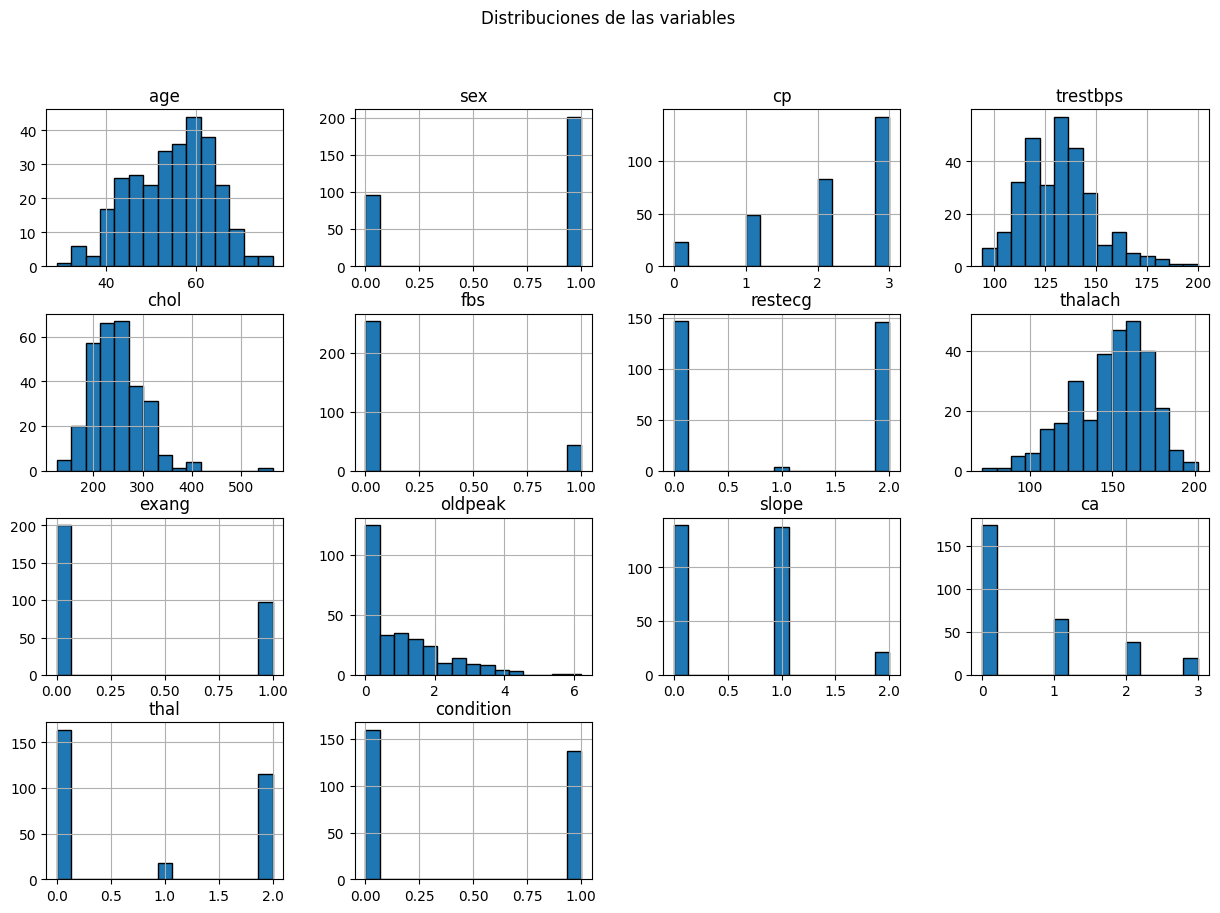

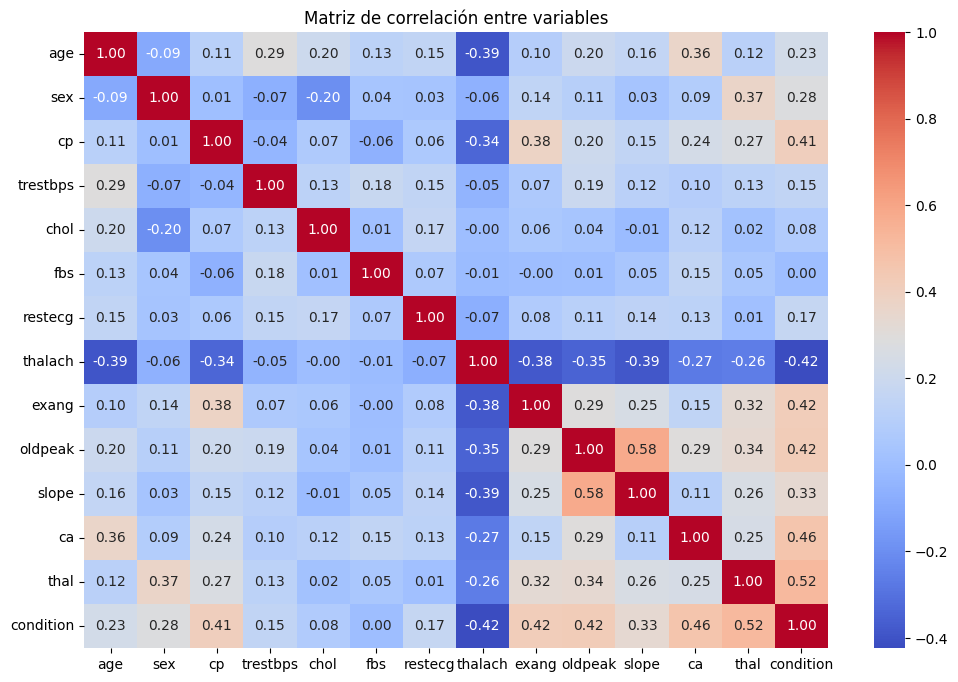

In [4]:
# Paso 1: Estadísticas descriptivas generales
print("Estadísticas descriptivas:")
print(data.describe())

# Paso 2: Comprobación de valores faltantes
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Paso 3: Histogramas para visualizar las distribuciones de las variables
data.hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones de las variables')
plt.show()

# Paso 4: Matriz de correlación para analizar relaciones entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()

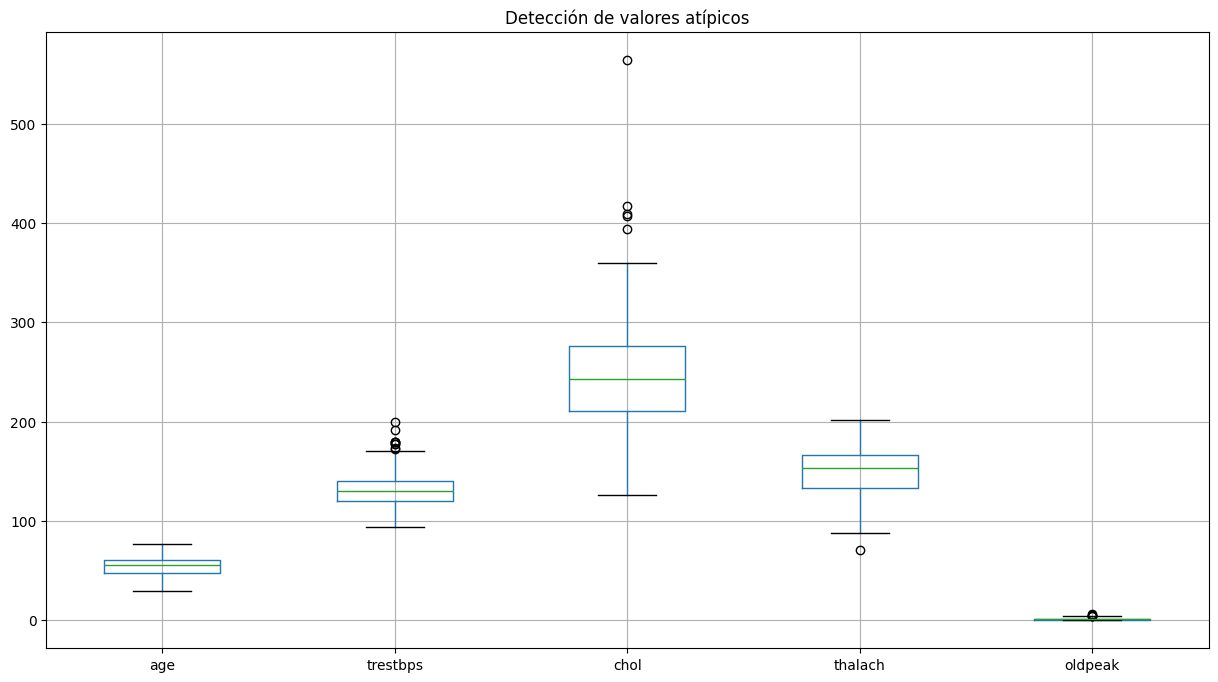


Valores atípicos detectados:
age: 0
trestbps: 9
chol: 5
thalach: 1
oldpeak: 5


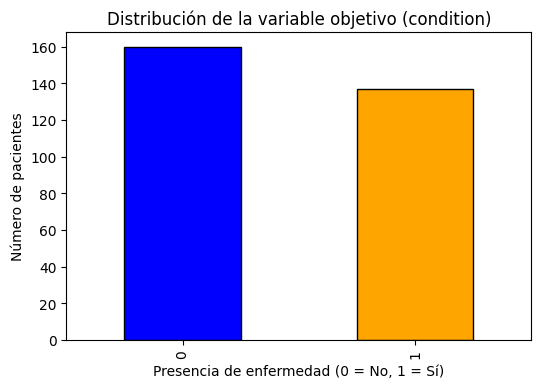


Primeras filas del dataset preprocesado:
        age  trestbps      chol   thalach   oldpeak  condition  sex_1   cp_1  \
0  1.600302  1.596266 -0.257179 -0.812095 -0.820813          0   True  False   
1  1.600302  0.468418 -0.160859  0.061157  0.639470          0  False  False   
2  1.268242  1.032342 -0.411292 -1.554358  1.326662          0  False  False   
3  1.157555  0.355633  0.667499  1.065396  0.295874          1   True  False   
4  1.046868 -1.223355 -0.700254 -0.244481  0.639470          0   True  False   

    cp_2   cp_3  ...  restecg_1  restecg_2  exang_1  slope_1  slope_2   ca_1  \
0  False  False  ...      False       True    False     True    False   True   
1  False  False  ...      False      False    False    False    False  False   
2  False  False  ...      False      False    False    False     True  False   
3  False  False  ...      False       True    False     True    False   True   
4  False  False  ...      False       True     True     True    False  False 

In [5]:
# 2. Preprocesar los datos
from sklearn.preprocessing import StandardScaler

# Paso 1: Detección y tratamiento de valores atípicos
# Visualizar los valores extremos
plt.figure(figsize=(15, 8))
data.boxplot(column=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.title("Detección de valores atípicos")
plt.show()

# Identificación de valores atípicos usando el rango intercuartílico (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Revisar valores atípicos en columnas numéricas
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
outliers = {col: detect_outliers_iqr(data, col) for col in numerical_columns}

# Mostrar cuántos valores atípicos hay en cada columna
print("\nValores atípicos detectados:")
for col, outlier_rows in outliers.items():
    print(f"{col}: {len(outlier_rows)}")

# Paso 2: Escalado de variables numéricas
scaler = StandardScaler()
scaled_columns = numerical_columns
data[scaled_columns] = scaler.fit_transform(data[scaled_columns])

# Paso 3: Codificación de variables categóricas
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Paso 4: Comprobación de equilibrio en la variable objetivo
plt.figure(figsize=(6, 4))
data['condition'].value_counts().plot(kind='bar', color=['blue', 'orange'], edgecolor='black')
plt.title('Distribución de la variable objetivo (condition)')
plt.xlabel('Presencia de enfermedad (0 = No, 1 = Sí)')
plt.ylabel('Número de pacientes')
plt.show()

# Mostrar las primeras filas del dataset preprocesado
print("\nPrimeras filas del dataset preprocesado:")
print(data.head())


Correlaciones con la variable objetivo (condition):
condition    1.000000
cp_3         0.507035
thal_2       0.484657
oldpeak      0.424052
exang_1      0.421355
slope_1      0.349635
sex_1        0.278467
ca_2         0.272400
ca_1         0.228974
age          0.227075
ca_3         0.209531
restecg_2    0.157440
trestbps     0.153490
thal_1       0.104651
chol         0.080285
restecg_1    0.067672
slope_2      0.060950
fbs_1        0.003167
cp_1        -0.247535
cp_2        -0.305345
thalach     -0.423817
Name: condition, dtype: float64

Importancia de características (Random Forest):
thalach: 0.1403
oldpeak: 0.1133
thal_2: 0.1075
cp_3: 0.0993
age: 0.0919
trestbps: 0.0780
chol: 0.0749
exang_1: 0.0601
sex_1: 0.0388
ca_1: 0.0358
slope_1: 0.0292
cp_2: 0.0287
ca_2: 0.0279
restecg_2: 0.0215
ca_3: 0.0169
cp_1: 0.0122
fbs_1: 0.0102
slope_2: 0.0073
thal_1: 0.0052
restecg_1: 0.0009


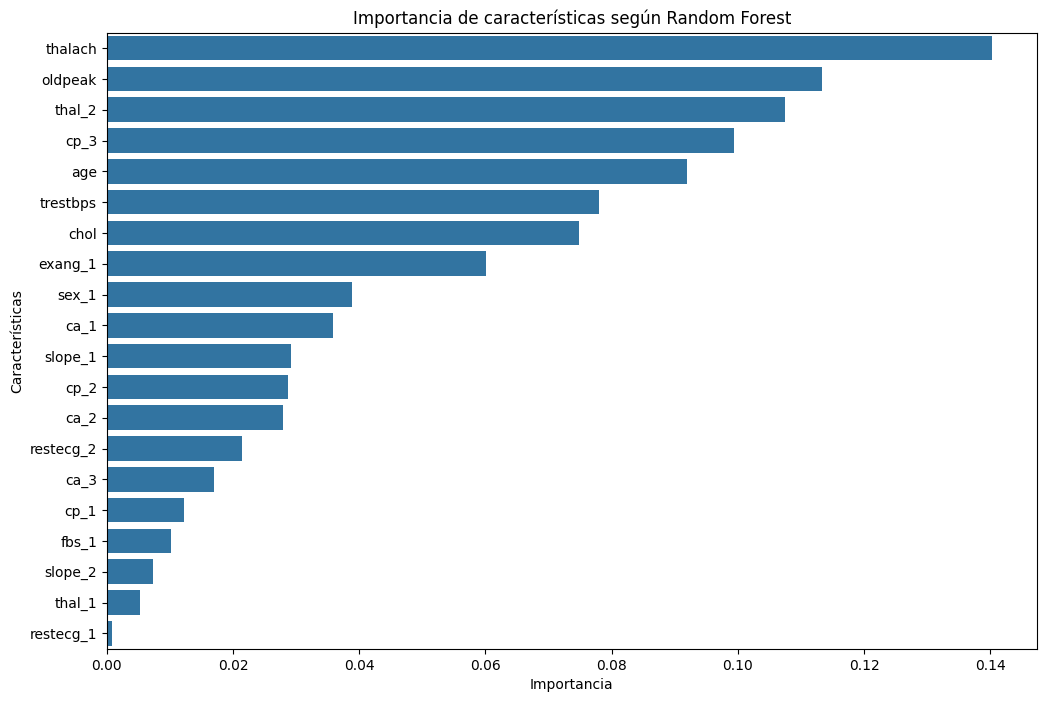


Características seleccionadas:
Index(['thalach', 'oldpeak', 'thal_2', 'cp_3', 'age', 'trestbps', 'chol',
       'exang_1'],
      dtype='object')


In [7]:
#3. Seleccionar las características más relevantes
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separar las características (X) y la variable objetivo (y)
X = data.drop('condition', axis=1)
y = data['condition']

# Paso 1: Análisis de correlación
correlations = data.corr()['condition'].sort_values(ascending=False)
print("Correlaciones con la variable objetivo (condition):")
print(correlations)

# Paso 2: Importancia de características usando Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Obtener importancias de características
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X.columns[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

# Mostrar las características más importantes
print("\nImportancia de características (Random Forest):")
for name, importance in zip(feature_names, sorted_importances):
    print(f"{name}: {importance:.4f}")

# Visualizar las importancias
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importances, y=feature_names)
plt.title('Importancia de características según Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Paso 3: Seleccionar las características principales
# Se seleccionan las características con importancia mayor al promedio
important_features = feature_names[sorted_importances > sorted_importances.mean()]
print("\nCaracterísticas seleccionadas:")
print(important_features)



In [8]:
#4. Dividir el dataset en Train y Test para evaluar correctamente el modelo
from sklearn.model_selection import train_test_split

# Paso 1: Filtrar solo las características seleccionadas
selected_features = ['thalach', 'oldpeak', 'thal_2', 'cp_3', 'age', 'trestbps', 'chol', 'exang_1']
X = data[selected_features]
y = data['condition']  # Variable objetivo

# Paso 2: División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Mostrar información sobre los conjuntos generados
print("Tamaño del conjunto de entrenamiento:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")

print("\nTamaño del conjunto de prueba:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento:
X_train: (207, 8), y_train: (207,)

Tamaño del conjunto de prueba:
X_test: (90, 8), y_test: (90,)


In [9]:
# 5. Entrenar el modelo configurando los diferentes hiperparámetros.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Paso 1: Crear el modelo base
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Paso 2: Configurar los hiperparámetros para búsqueda de la mejor configuración
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['liblinear', 'lbfgs'],  # Algoritmos de optimización
    'penalty': ['l2']  # Tipo de regularización
}

# Paso 3: Búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Paso 4: Obtener el mejor modelo
best_model = grid_search.best_estimator_
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Paso 5: Entrenar el modelo con los datos de entrenamiento
best_model.fit(X_train, y_train)
print("\nModelo entrenado con éxito.")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Mejores hiperparámetros encontrados:
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Modelo entrenado con éxito.


Métricas de evaluación en el conjunto de prueba:
Precisión (Accuracy): 0.7889
Precisión Positiva (Precision): 0.8108
Sensibilidad (Recall): 0.7143
F1-Score: 0.7595


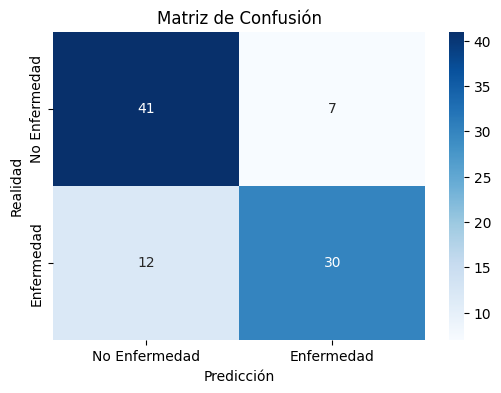


Informe de clasificación detallado:
               precision    recall  f1-score   support

No Enfermedad       0.77      0.85      0.81        48
   Enfermedad       0.81      0.71      0.76        42

     accuracy                           0.79        90
    macro avg       0.79      0.78      0.79        90
 weighted avg       0.79      0.79      0.79        90



In [10]:
#6. Evaluación del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Paso 1: Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Paso 2: Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Mostrar métricas
print("Métricas de evaluación en el conjunto de prueba:")
print(f"Precisión (Accuracy): {accuracy:.4f}")
print(f"Precisión Positiva (Precision): {precision:.4f}")
print(f"Sensibilidad (Recall): {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Paso 3: Generar y visualizar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Paso 4: Informe de clasificación detallado
print("\nInforme de clasificación detallado:")
print(classification_report(y_test, y_pred, target_names=['No Enfermedad', 'Enfermedad']))

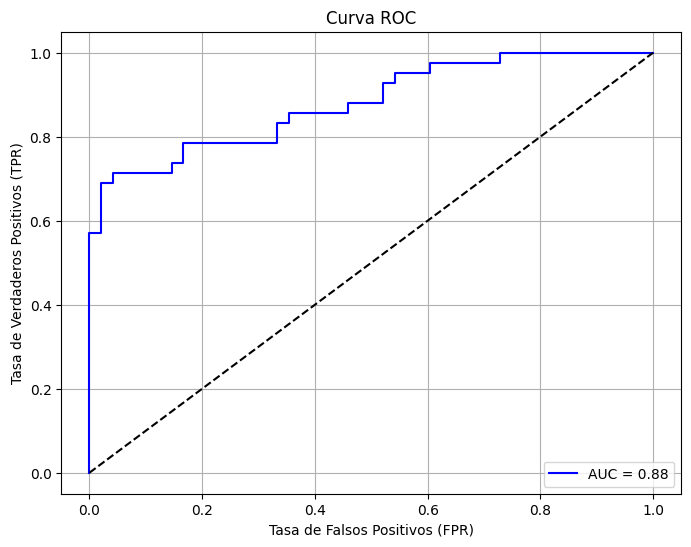

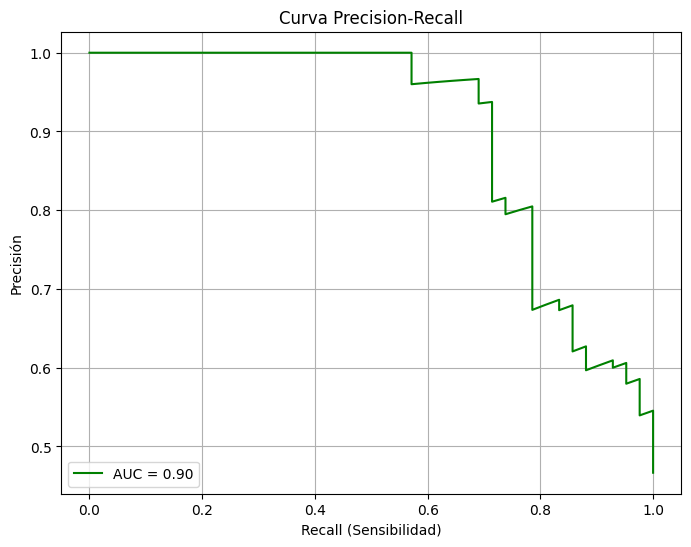

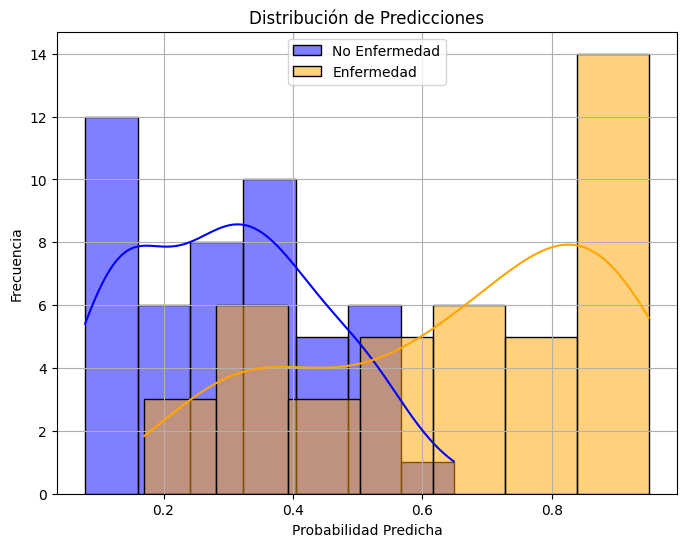

In [12]:
#7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

# Paso 1: Calcular probabilidades predichas
y_proba = best_model.predict_proba(X_test)[:, 1]

# Paso 2: Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Corrección aquí
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Paso 3: Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AUC = {pr_auc:.2f}', color='green')
plt.title('Curva Precision-Recall')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Paso 4: Distribución de predicciones
plt.figure(figsize=(8, 6))
sns.histplot(y_proba[y_test == 0], color='blue', label='No Enfermedad', kde=True)
sns.histplot(y_proba[y_test == 1], color='orange', label='Enfermedad', kde=True)
plt.title('Distribución de Predicciones')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.legend(loc='upper center')
plt.grid(True)
plt.show()